# Timbre (音色)

* [Timbre - Wikipedia](https://en.wikipedia.org/wiki/Timbre)
    - [Spectrogram - Wikipedia](https://en.wikipedia.org/wiki/Spectrogram)

## 音源を読み込む

* [librosa/librosa: Python library for audio and music analysis](https://github.com/librosa/librosa)
    - [librosa.load — librosa 0.10.1dev documentation](https://librosa.org/doc/main/generated/librosa.load.html)

In [2]:
import librosa

In [3]:
Fs = 11025

In [4]:
x, Fs = librosa.load('FMP_C1_F23_Piano.wav', sr=Fs)

In [5]:
len(x), len(x)/Fs

(45504, 4.12734693877551)

## 音源を再生する

In [6]:
import IPython.display as ipd

In [7]:
ipd.display(ipd.Audio(data=x, rate=Fs))

## 波形を表示する

In [8]:
import libfmp.c1
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

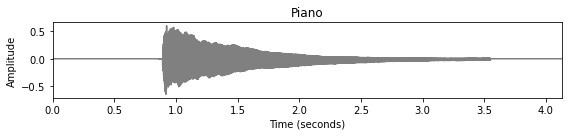

In [10]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=(8,2), ylabel='Amplitude', title='Piano')
plt.show()

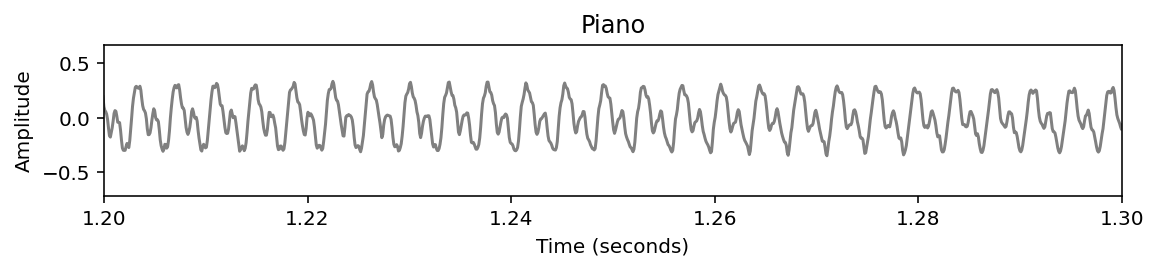

In [11]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=(8,2), ylabel='Amplitude', title='Piano')
plt.xlim(1.2, 1.3)
plt.show()

## スペクトログラムを表示する

* [C1S3_Timbre](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S3_Timbre.html)
    - [librosa.stft — librosa 0.10.1dev documentation](https://librosa.org/doc/main/generated/librosa.stft.html)
    - [librosa.display.specshow — librosa 0.10.1dev documentation](https://librosa.org/doc/main/generated/librosa.display.specshow.html)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def plot_spectrogram(x, Fs=11025, N=4096, H=2048, figsize=(4, 2)):
    """Computation and subsequent plotting of the spectrogram of a signal

    Notebook: C1/C1S3_Timbre.ipynb

    Args:
        x: Signal (waveform) to be analyzed
        Fs: Sampling rate (Default value = 11025)
        N: FFT length (Default value = 4096)
        H: Hopsize (Default value = 2048)
        figsize: Size of the figure (Default value = (4, 2))

    """
    # N, H = 2048, 1024
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window=np.hanning)  # not 'hamming'
    Y = np.abs(X)
    plt.figure(figsize=figsize)
    librosa.display.specshow(librosa.amplitude_to_db(Y, ref=np.max),
                             y_axis='linear', x_axis='time', sr=Fs, hop_length=H) # cmap='gray_r'
    plt.ylim([0, 3000])
    # plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

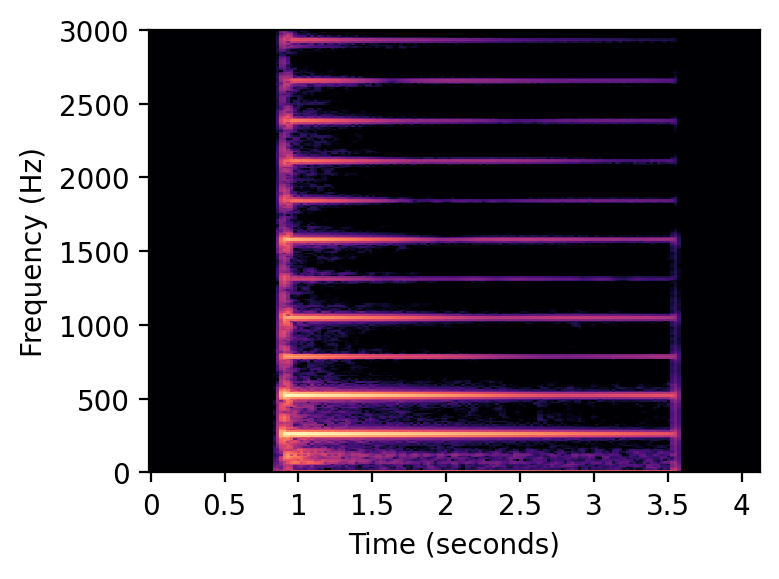

In [14]:
plot_spectrogram(x, Fs=Fs, N=1024, H=256, figsize=(4, 3))

```{note}
スペクトログラムは、時間 (横軸)、周波数（縦軸)、信号成分の強さ（色）の三次元グラフです
```

## 他の音源についてもやってみる

* `FMP_C1_F23_Piano.wav`
* `FMP_C1_F23_Trumpet.wav`
* `FMP_C1_F23_Violin.wav`
* `FMP_C1_F23_Flute.wav`

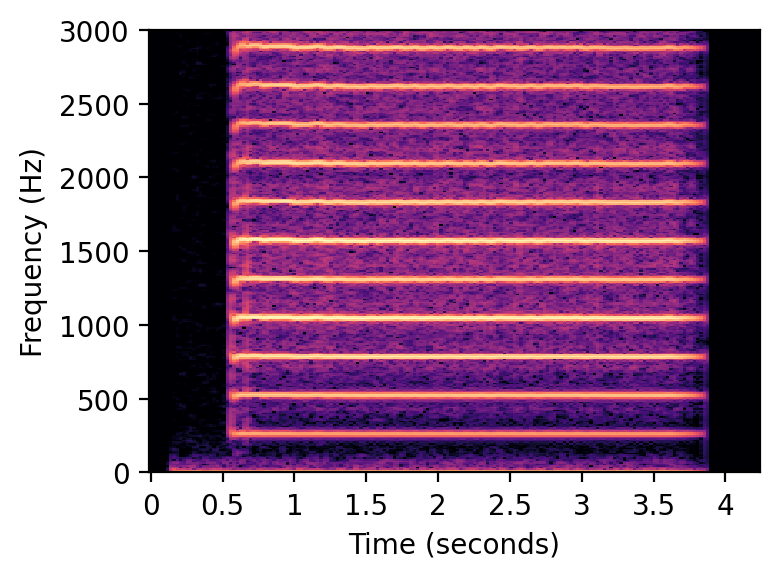

In [15]:
x, Fs = librosa.load('FMP_C1_F23_Trumpet.wav', sr=Fs)
plot_spectrogram(x, Fs=Fs, N=1024, H=256, figsize=(4, 3))

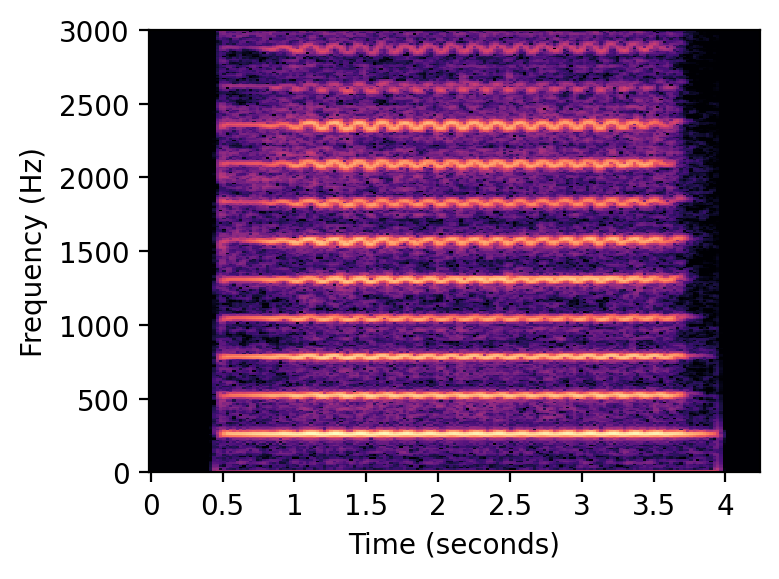

In [16]:
x, Fs = librosa.load('FMP_C1_F23_Violin.wav', sr=Fs)
plot_spectrogram(x, Fs=Fs, N=1024, H=256, figsize=(4, 3))

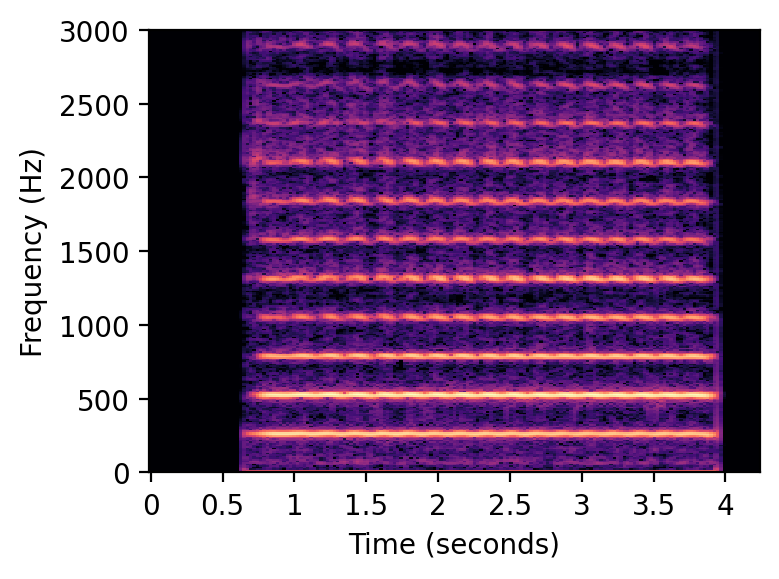

In [17]:
x, Fs = librosa.load('FMP_C1_F23_Flute.wav', sr=Fs)
plot_spectrogram(x, Fs=Fs, N=1024, H=256, figsize=(4, 3))